# ML Project

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/MyDrive/MLProject/

/content/drive/MyDrive/MLProject


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sea

In [4]:
# Load dataset
data = 'star_classification.csv'
df = pd.read_csv(data)

## Basic dataset visualization

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [6]:
# Preview the dataset
pd.set_option('display.max_columns', None) # to display all the columns
print(df.head()) # first 5 elements

         obj_ID       alpha      delta         u         g         r  \
0  1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1  1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2  1.237661e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3  1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4  1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   

          i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
0  19.16573  18.79371    3606       301        2        79  6.543777e+18   
1  21.16812  21.61427    4518       301        5       119  1.176014e+19   
2  19.34857  18.94827    3606       301        2       120  5.152200e+18   
3  20.50454  19.25010    4192       301        3       214  1.030107e+19   
4  15.97711  15.54461    8102       301        3       137  6.891865e+18   

    class  redshift  plate    MJD  fiber_ID  
0  GALAXY  0.634794   5812  56354       171  
1  GALAXY  0.77913

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64


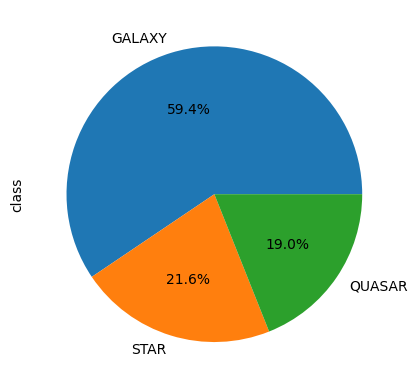

In [7]:
# Class distribution
print(df["class"].value_counts())
plt.figure()
figure = (df['class'].value_counts()*100.0 /len(df))\
		.plot.pie(autopct='%.1f%%', labels = ['GALAXY', 'STAR', 'QUASAR'])
plt.show()

Il dataset è sbilanciato

In [8]:
# Class numerical conversion
df["class"]=[0 if i == "GALAXY" else 1 if i == "STAR" else 2 for i in df["class"]]

In [9]:
# View summary statistics in numerical variables
print(round(df.describe(),2))

             obj_ID      alpha      delta          u          g          r  \
count  1.000000e+05  100000.00  100000.00  100000.00  100000.00  100000.00   
mean   1.237665e+18     177.63      24.14      21.98      20.53      19.65   
std    8.438560e+12      96.50      19.64      31.77      31.75       1.85   
min    1.237646e+18       0.01     -18.79   -9999.00   -9999.00       9.82   
25%    1.237659e+18     127.52       5.15      20.35      18.97      18.14   
50%    1.237663e+18     180.90      23.65      22.18      21.10      20.13   
75%    1.237668e+18     233.90      39.90      23.69      22.12      21.04   
max    1.237681e+18     360.00      83.00      32.78      31.60      29.57   

               i          z     run_ID  rerun_ID    cam_col   field_ID  \
count  100000.00  100000.00  100000.00  100000.0  100000.00  100000.00   
mean       19.08      18.67    4481.37     301.0       3.51     186.13   
std         1.76      31.73    1964.76       0.0       1.59     149.01   
m

In [10]:
# rerun_ID seems to be unique
print(df.nunique())

obj_ID          78053
alpha           99999
delta           99999
u               93748
g               92651
r               91901
i               92019
z               92007
run_ID            430
rerun_ID            1
cam_col             6
field_ID          856
spec_obj_ID    100000
class               3
redshift        99295
plate            6284
MJD              2180
fiber_ID         1000
dtype: int64


In [11]:
# remove rerun_ID from dataset
df.drop(columns=['rerun_ID'], axis=1, inplace=True)
print(df.columns)

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift', 'plate',
       'MJD', 'fiber_ID'],
      dtype='object')


Da una prima analisi superficiale del dataset si è notato che:
- il dataset presenta 100000 campioni con 18 colonne;
- si hanno 17 features + la classe di appartenenza, di cui 10 continue e 8 discrete;
- non ci sono valori nulli;
- il dataset risulta sbilanciato, in particolare la classe 'GALAXY' risulta avere un numero di campioni triplo rispetto alle altre due ('STAR' e 'QUASAR');
- la variabile classe non è in forma numerica, si è perciò convertita in forma numerica;
- da una prima analisi statistica sui dati è possibile intuire che u, g e z contengono degli outliers;
- la colonna 'rerun_ID' è costante per tutto il dataset;

## Analisi delle features

Da una prima analisi statistica dei dati si è visto che in alcune features potrebbero esserci degli outliers.

['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'redshift', 'plate', 'MJD', 'fiber_ID']


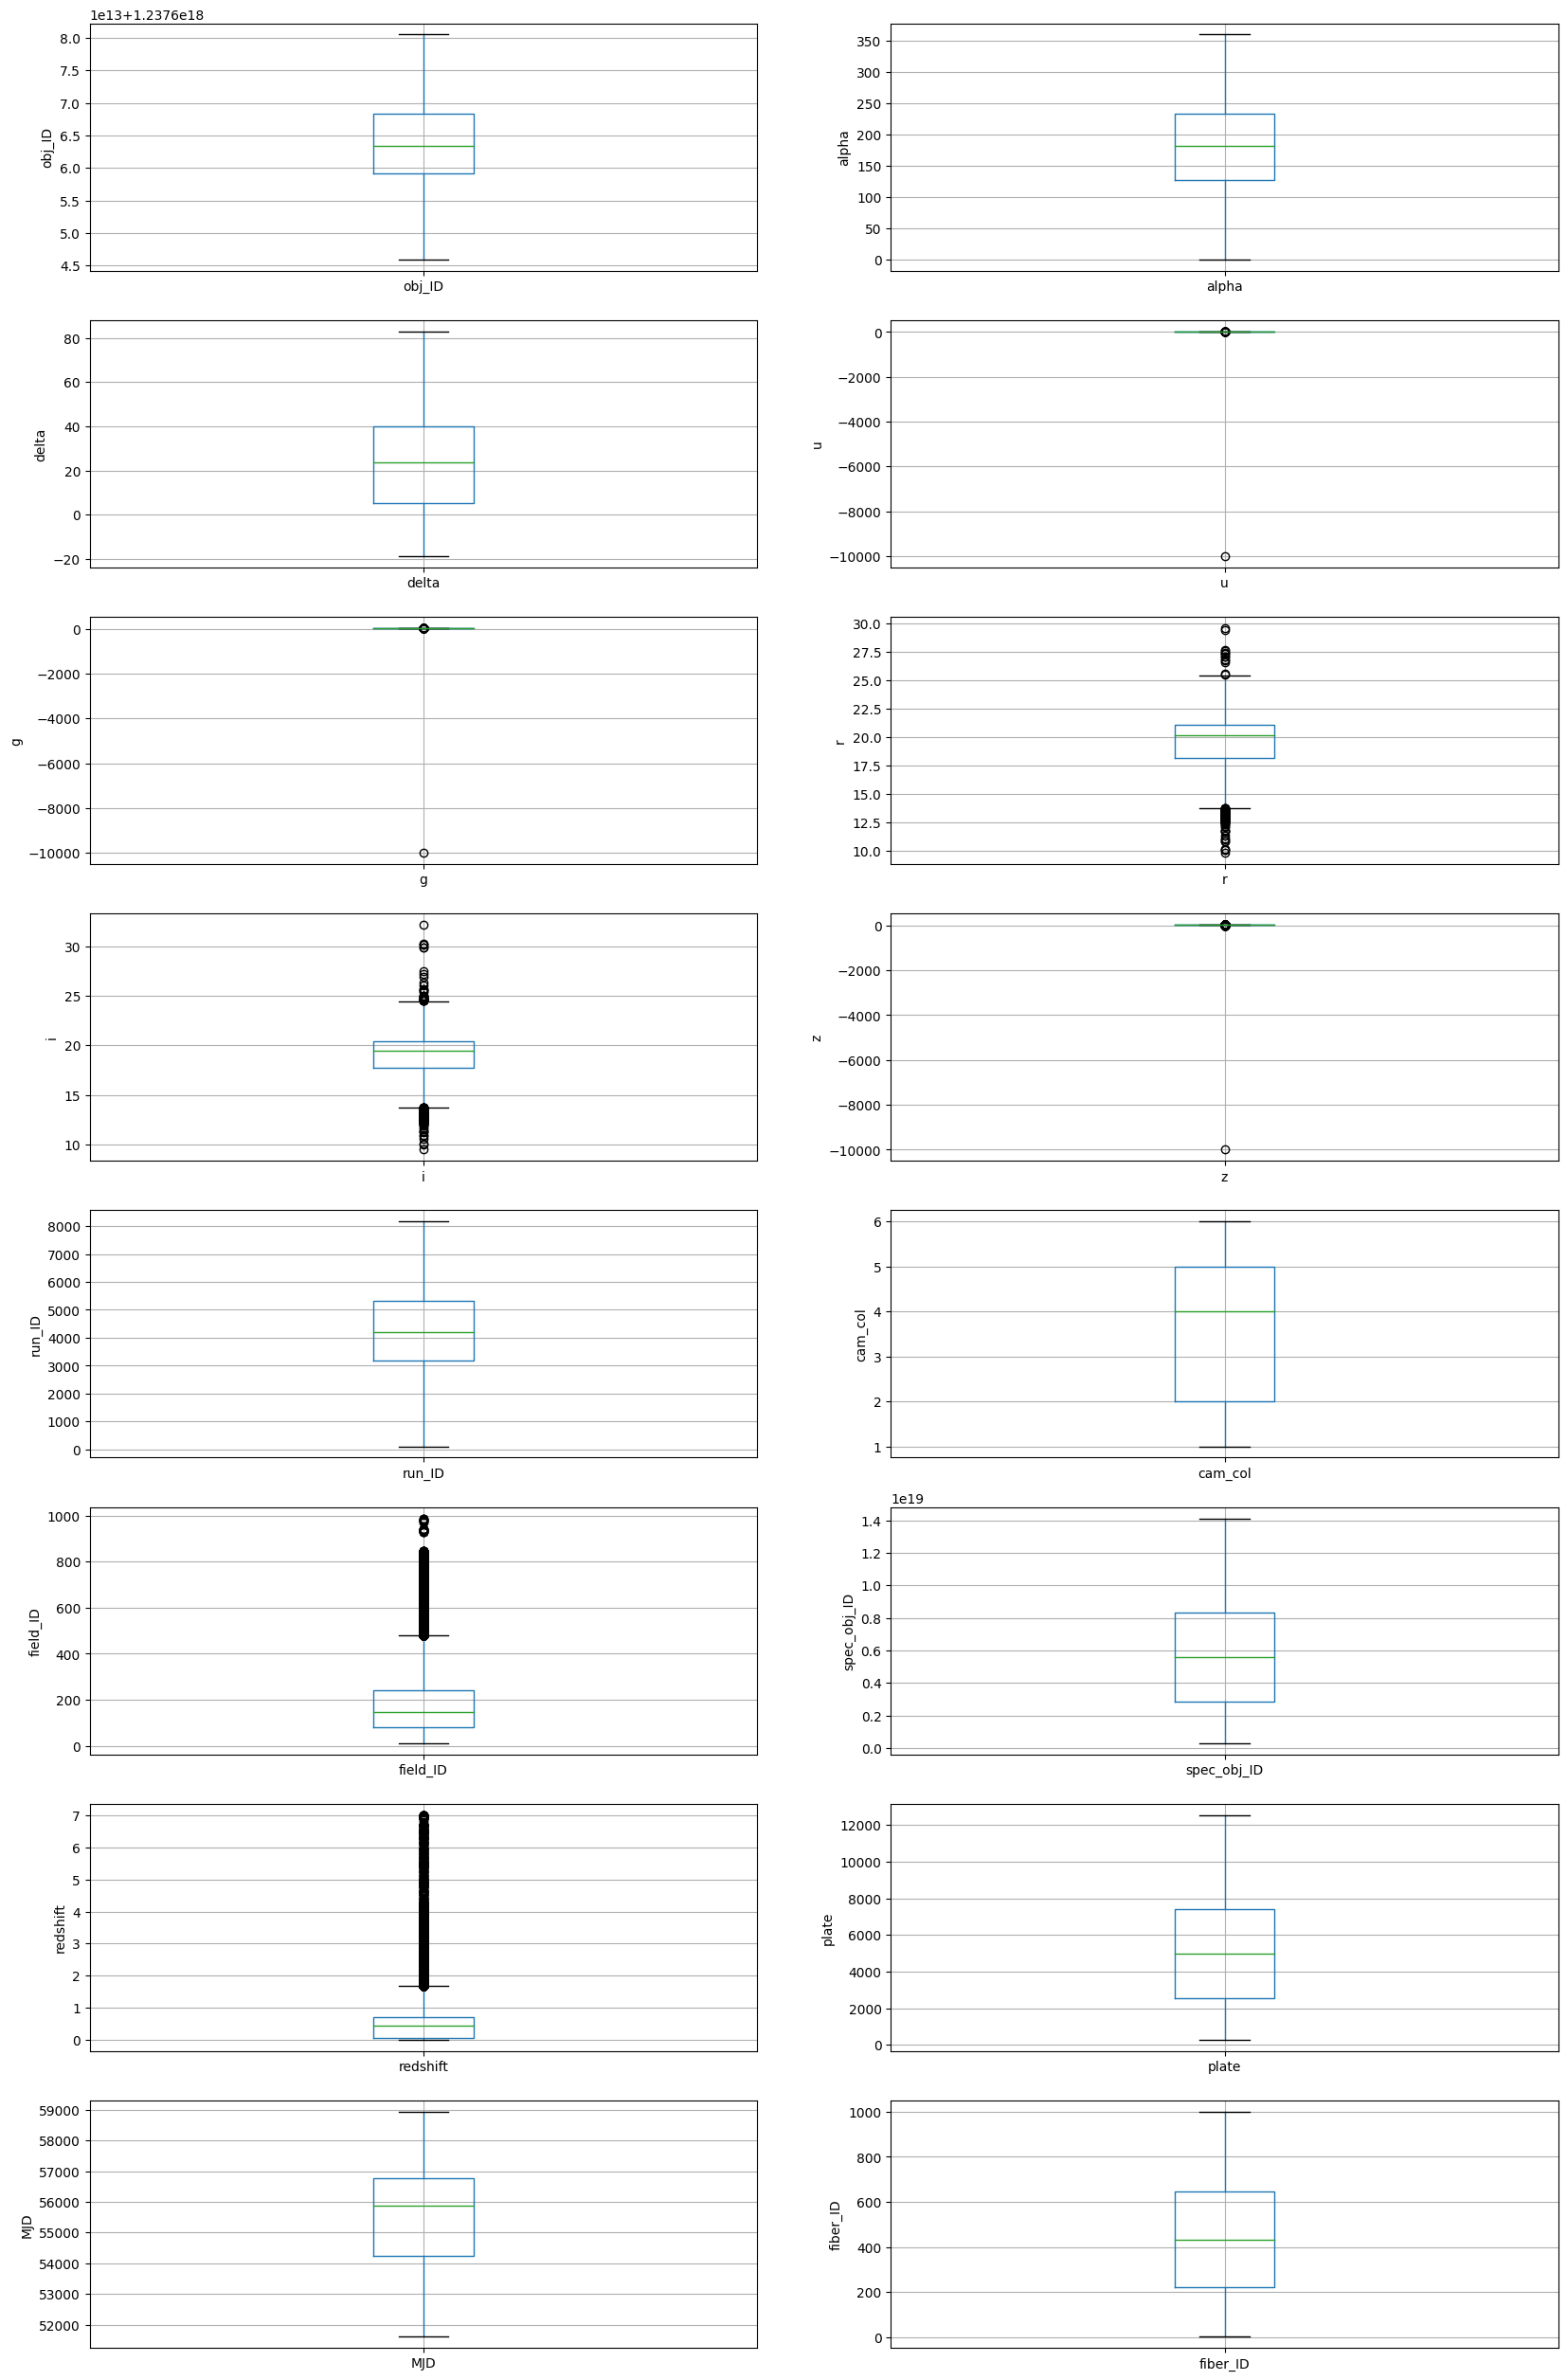

In [12]:
features = list(df.columns)
features.remove('class')
print(features)

plt.figure(figsize=(20,40))

i=1
for f in features:
    plt.subplot(10, 2, i)
    fig = df.boxplot(column=f)
    fig.set_title('')
    fig.set_ylabel(f)
    i += 1

E' subito possibile notare che u, g e z presentano 1 valore che si comporta in modo completamente diverso rispetto agli altri, ciò è dovuto probabilmente a degli errori, è quindi necessario rimuoverli.

### Filtri u, g, r, i e z

Le features u, g, r, i, z isolano specifiche bande di lunghezza d'onda della luce, in particolare:
- "u" rappresenta il filtro ultravioletto
- "g" rappresenta il filtro verde
- "r" rappresenta il filtro rosso
- "i" rappresenta il filtro infrarosso vicino
- "z" rappresenta il filtro infrarosso

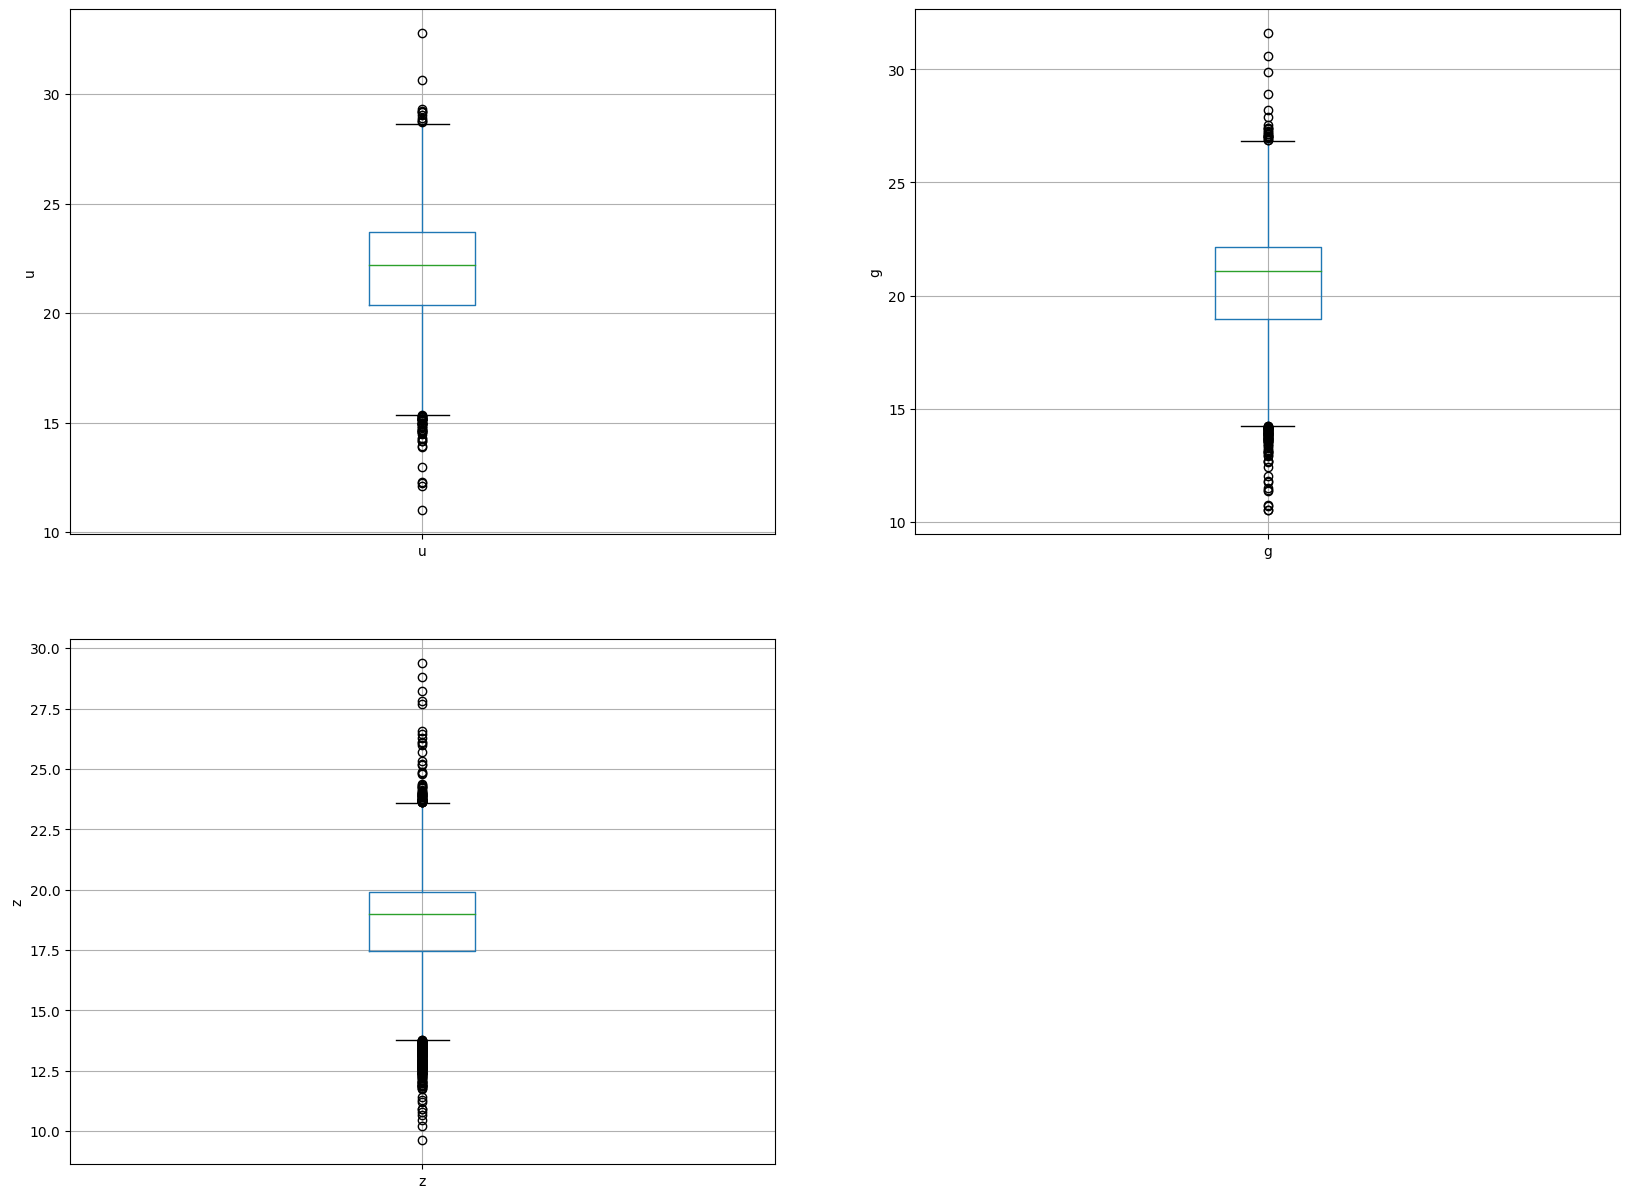

In [13]:
# Remove strange value from u, g and z
u_out = min(df['u'])
g_out = min(df['g'])
z_out = min(df['z'])

df = df[df.u != u_out]
df = df[df.g != g_out]
df = df[df.z != z_out]

plt.figure(figsize=(20,15))
i=1
for f in ['u', 'g', 'z']:
    plt.subplot(2, 2, i)
    fig = df.boxplot(column=f)
    fig.set_title('')
    fig.set_ylabel(f)
    i += 1

Ha ora senso valutare la distribuzione dei filtri rispetto alla classe di output.

<ipython-input-14-4de3541efa8d>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sea.kdeplot(data=df[df["class"] == i][f], label = class_[i], shade = True)
<ipython-input-14-4de3541efa8d>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sea.kdeplot(data=df[df["class"] == i][f], label = class_[i], shade = True)
<ipython-input-14-4de3541efa8d>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sea.kdeplot(data=df[df["class"] == i][f], label = class_[i], shade = True)
<ipython-input-14-4de3541efa8d>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sea

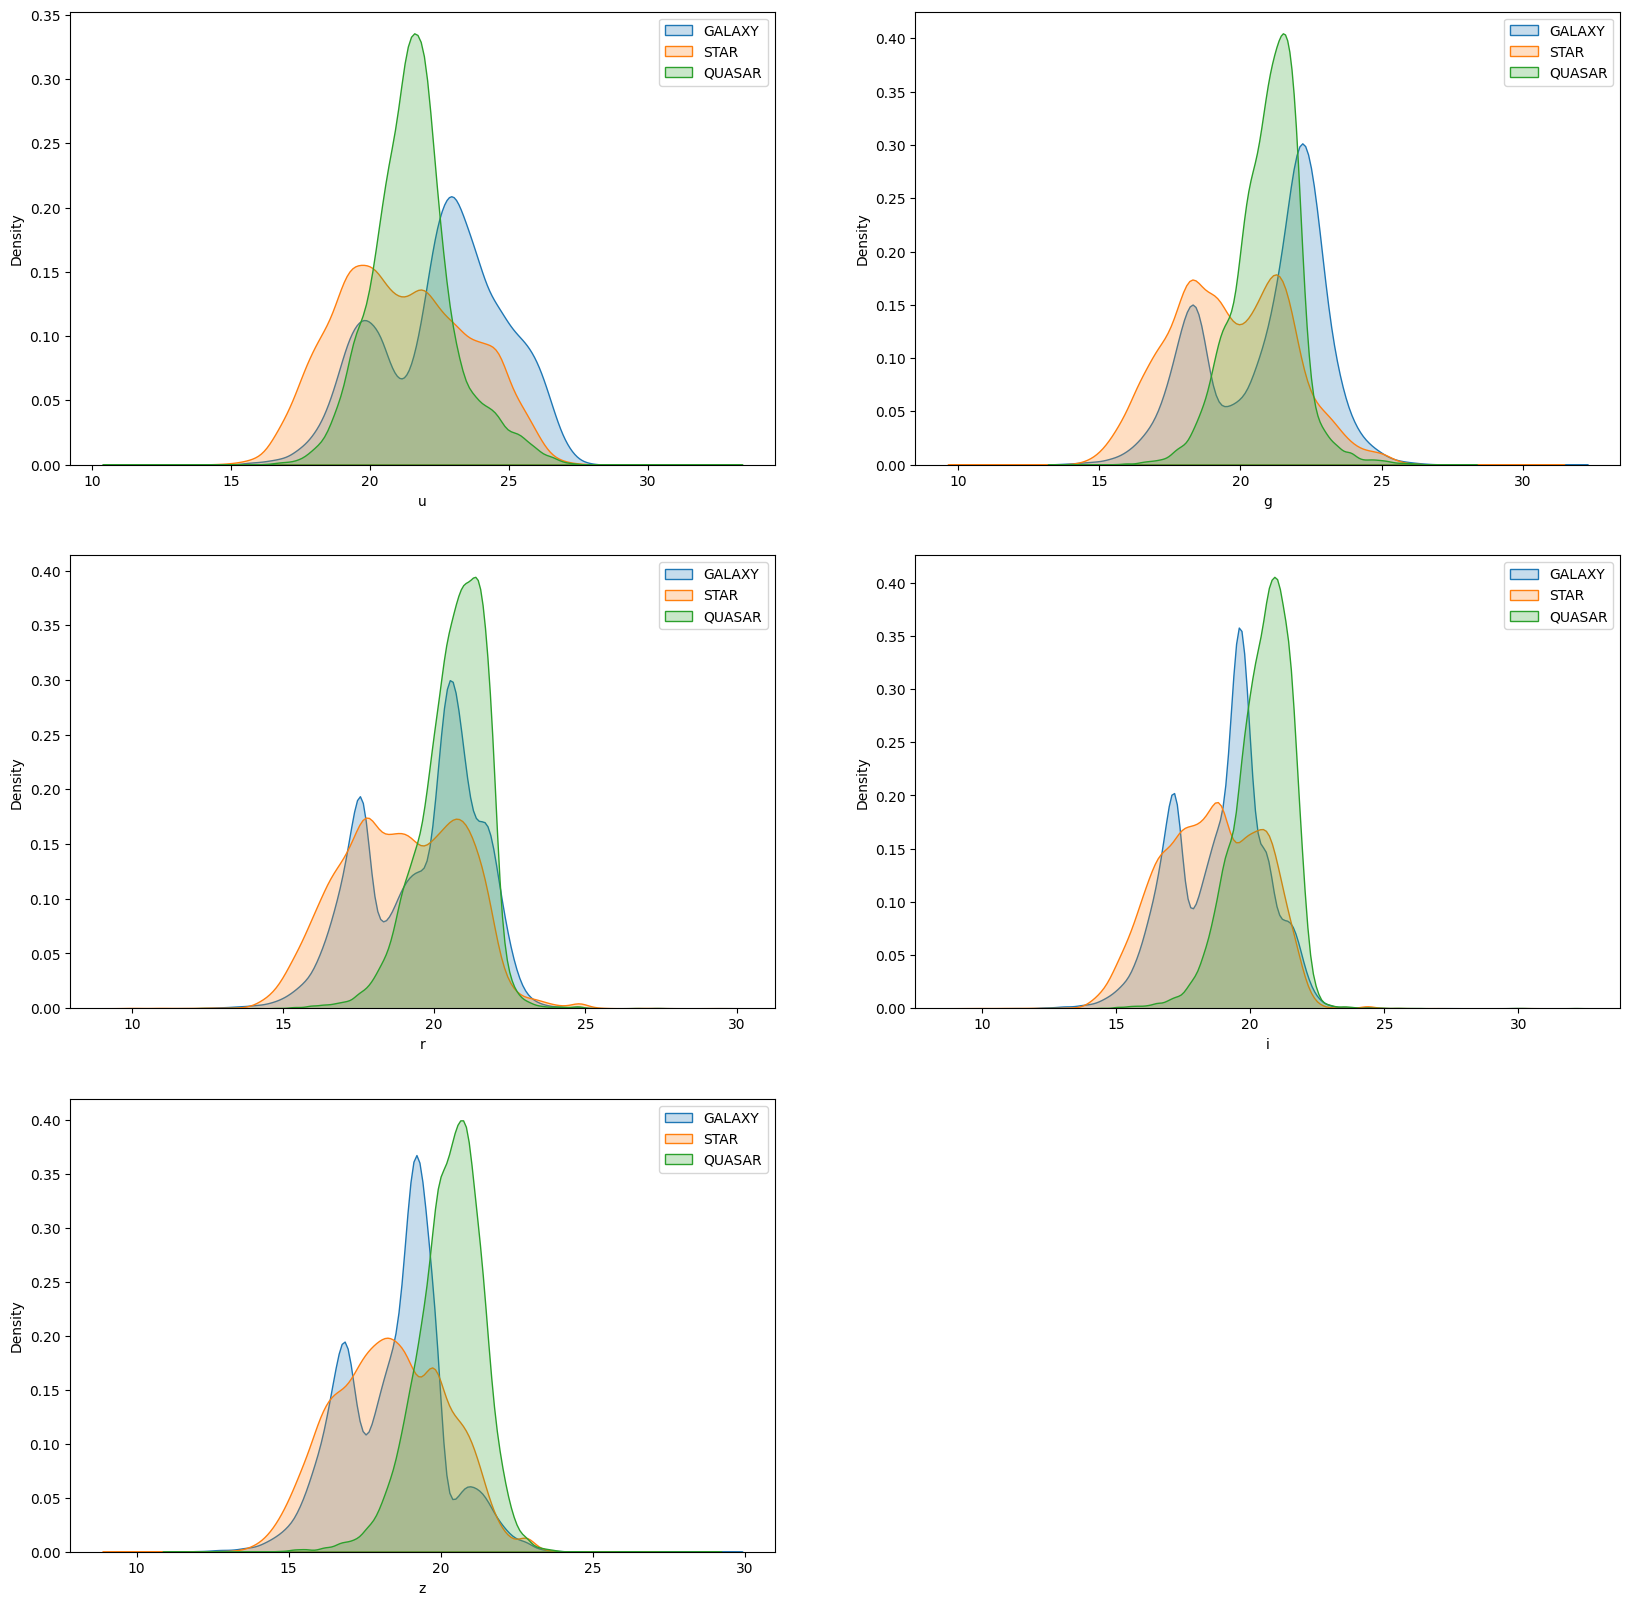

In [14]:
filter_ = ['u', 'g', 'r', 'i', 'z']
class_ = ['GALAXY', 'STAR', 'QUASAR']
j=1
plt.figure(figsize=(20,20))
for f in filter_:
    plt.subplot(3, 2, j)
    for i in range(3):
        sea.kdeplot(data=df[df["class"] == i][f], label = class_[i], shade = True)
        plt.legend()
    j += 1

E' possibile notare che z e i presentano delle distribuzioni molto simili delle classi, in effetti entrambi rappresentano l'infrarosso (i è l'infrarosso "vicino"), potrebbe esserci una elevata collinearità.

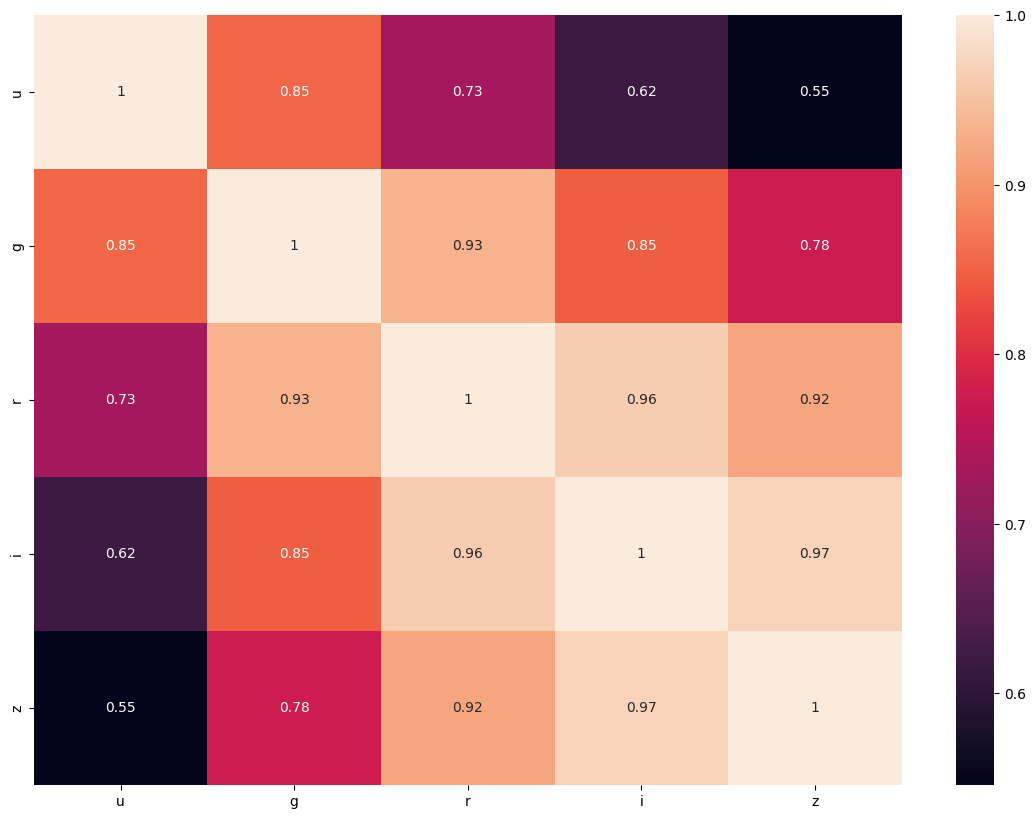

In [15]:
filters_data = df[filter_]
plt.figure(figsize = (14,10))
sea.heatmap(filters_data.corr(), annot = True)
plt.show()

In effetti i filtri rosso (r), infrarosso vicino (i) e infrarosso (z) presentano una eleveata collinearità. Si è quindi deciso di rimuovere le colonne r e i e mantenere quella più distante nello spettro, ovvero z, dato che essa potrebbe contenere più informazioni rispetto a quelle contenute nei filtri r e i. In effetti z è quella meno collineare con u e g.

In [16]:
# remove features
df.drop(columns=['r', 'i'], axis=1, inplace=True)
print(df.columns)

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'z', 'run_ID', 'cam_col',
       'field_ID', 'spec_obj_ID', 'class', 'redshift', 'plate', 'MJD',
       'fiber_ID'],
      dtype='object')


### Redshift

Anche redshift potrebbe presenta dei valori anomali. Si vuole controllare se tali punti appartengono alla stessa classe, perché se ciò fosse vero essi risulterebbero punti importanti e quindi non andrebbero considerati outliers.

Text(0, 0.5, 'z')

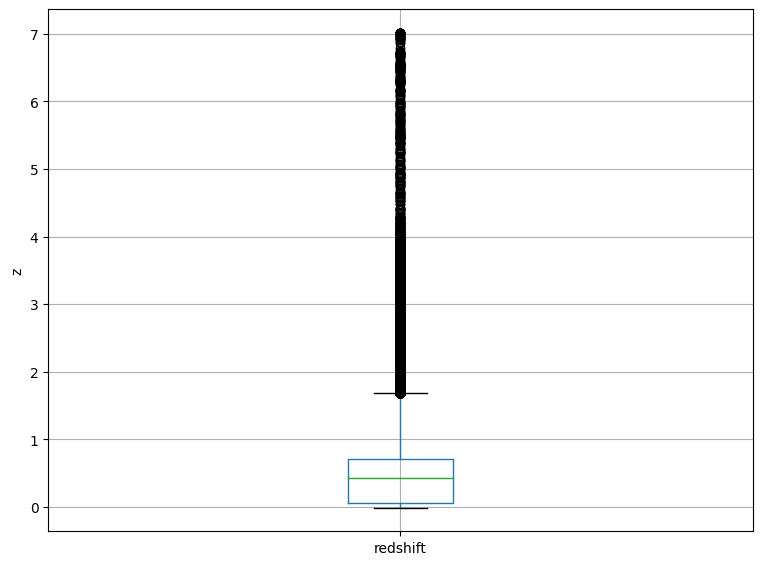

In [17]:
plt.figure(figsize=(20,80))

plt.subplot(10, 2, 1)
fig = df.boxplot(column='redshift')
fig.set_title('')
fig.set_ylabel(f)

<ipython-input-18-fb573defe521>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sea.kdeplot(data=y, label = class_[i], shade = True)
<ipython-input-18-fb573defe521>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sea.kdeplot(data=y, label = class_[i], shade = True)
<ipython-input-18-fb573defe521>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sea.kdeplot(data=y, label = class_[i], shade = True)


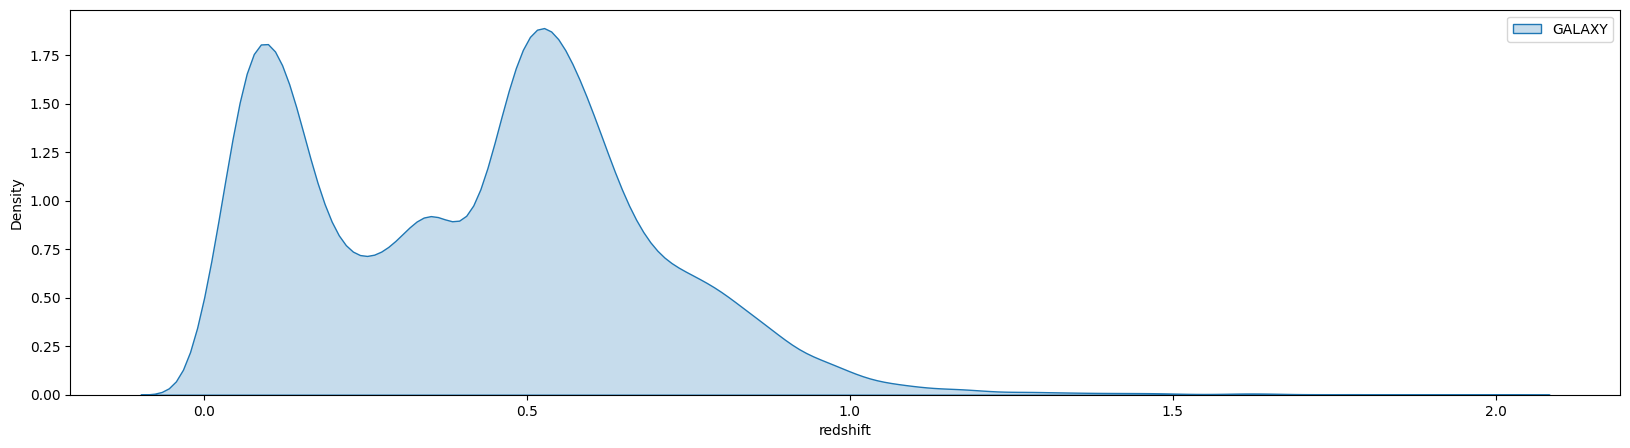

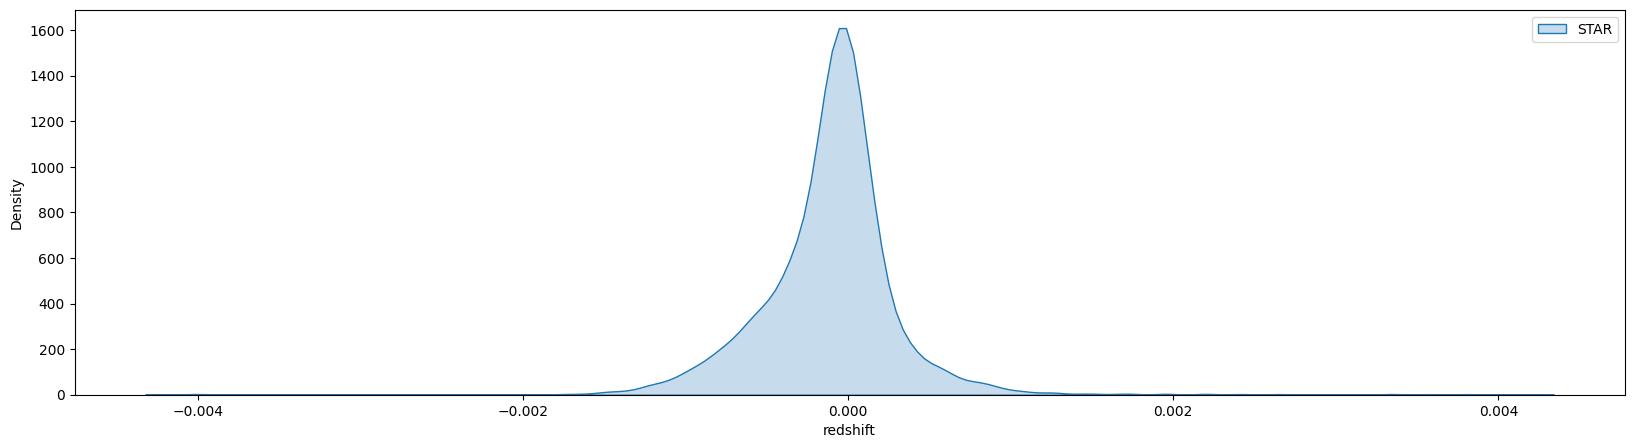

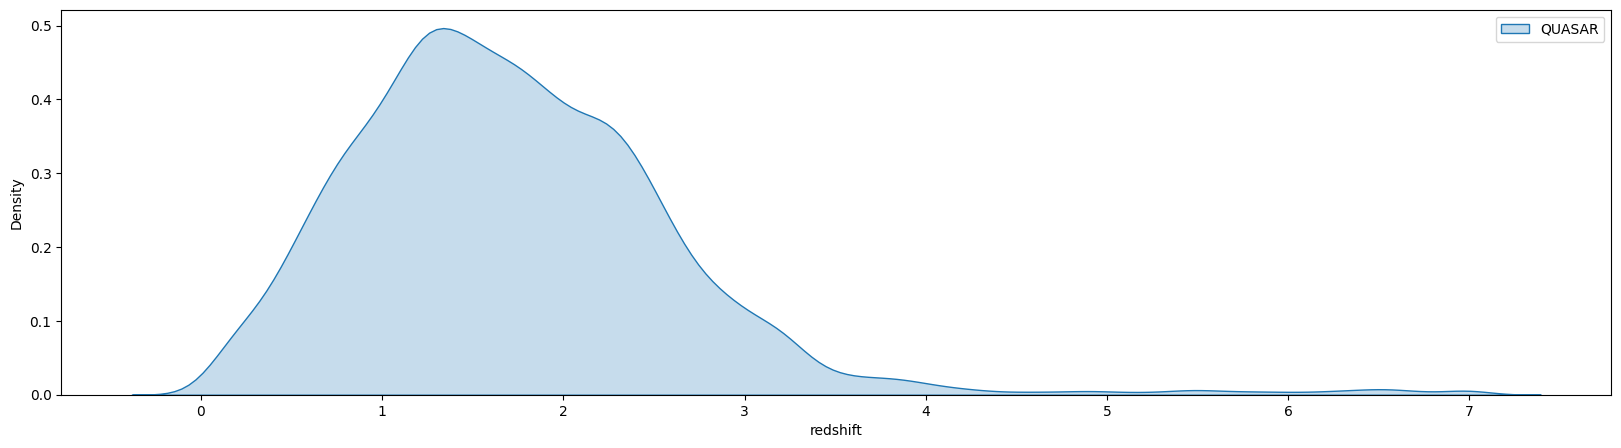

In [18]:
for i in range(3):
    plt.figure(figsize=(20,5))
    y = df[df["class"] == i]['redshift']
    sea.kdeplot(data=y, label = class_[i], shade = True)
    plt.legend();

E' possibile notare che le classi sono molto ben separate rispetto al redshift. STAR infatti ha redshift pari circa a 0. GALAXY ha redshift nell'intervallo [0,1] mentre QUASAR ha redshift nell'intervallo [0,3].

In [19]:
correlation = df.corr()
print(correlation['redshift']['class'])

0.536828848053327


In effetti la correlazione tra la classe e redshift è molto elevata. Tale feature risulterà quindi molto importante nella classificazione.

Quindi i punti che per redshift>2 sembravano essere outliers in realtà appartengono per la maggior parte alla classe 'QUASAR', si è perciò deciso di non considerarli outliers.

### Rimozione features

Conviene ora analizzare la collinearità di alcune features con la classe al fine di eliminare features inutili. NOTA: alcune features anche se non direttamente collineari con la classe potrebbero essere importanti se collegate con altre features.

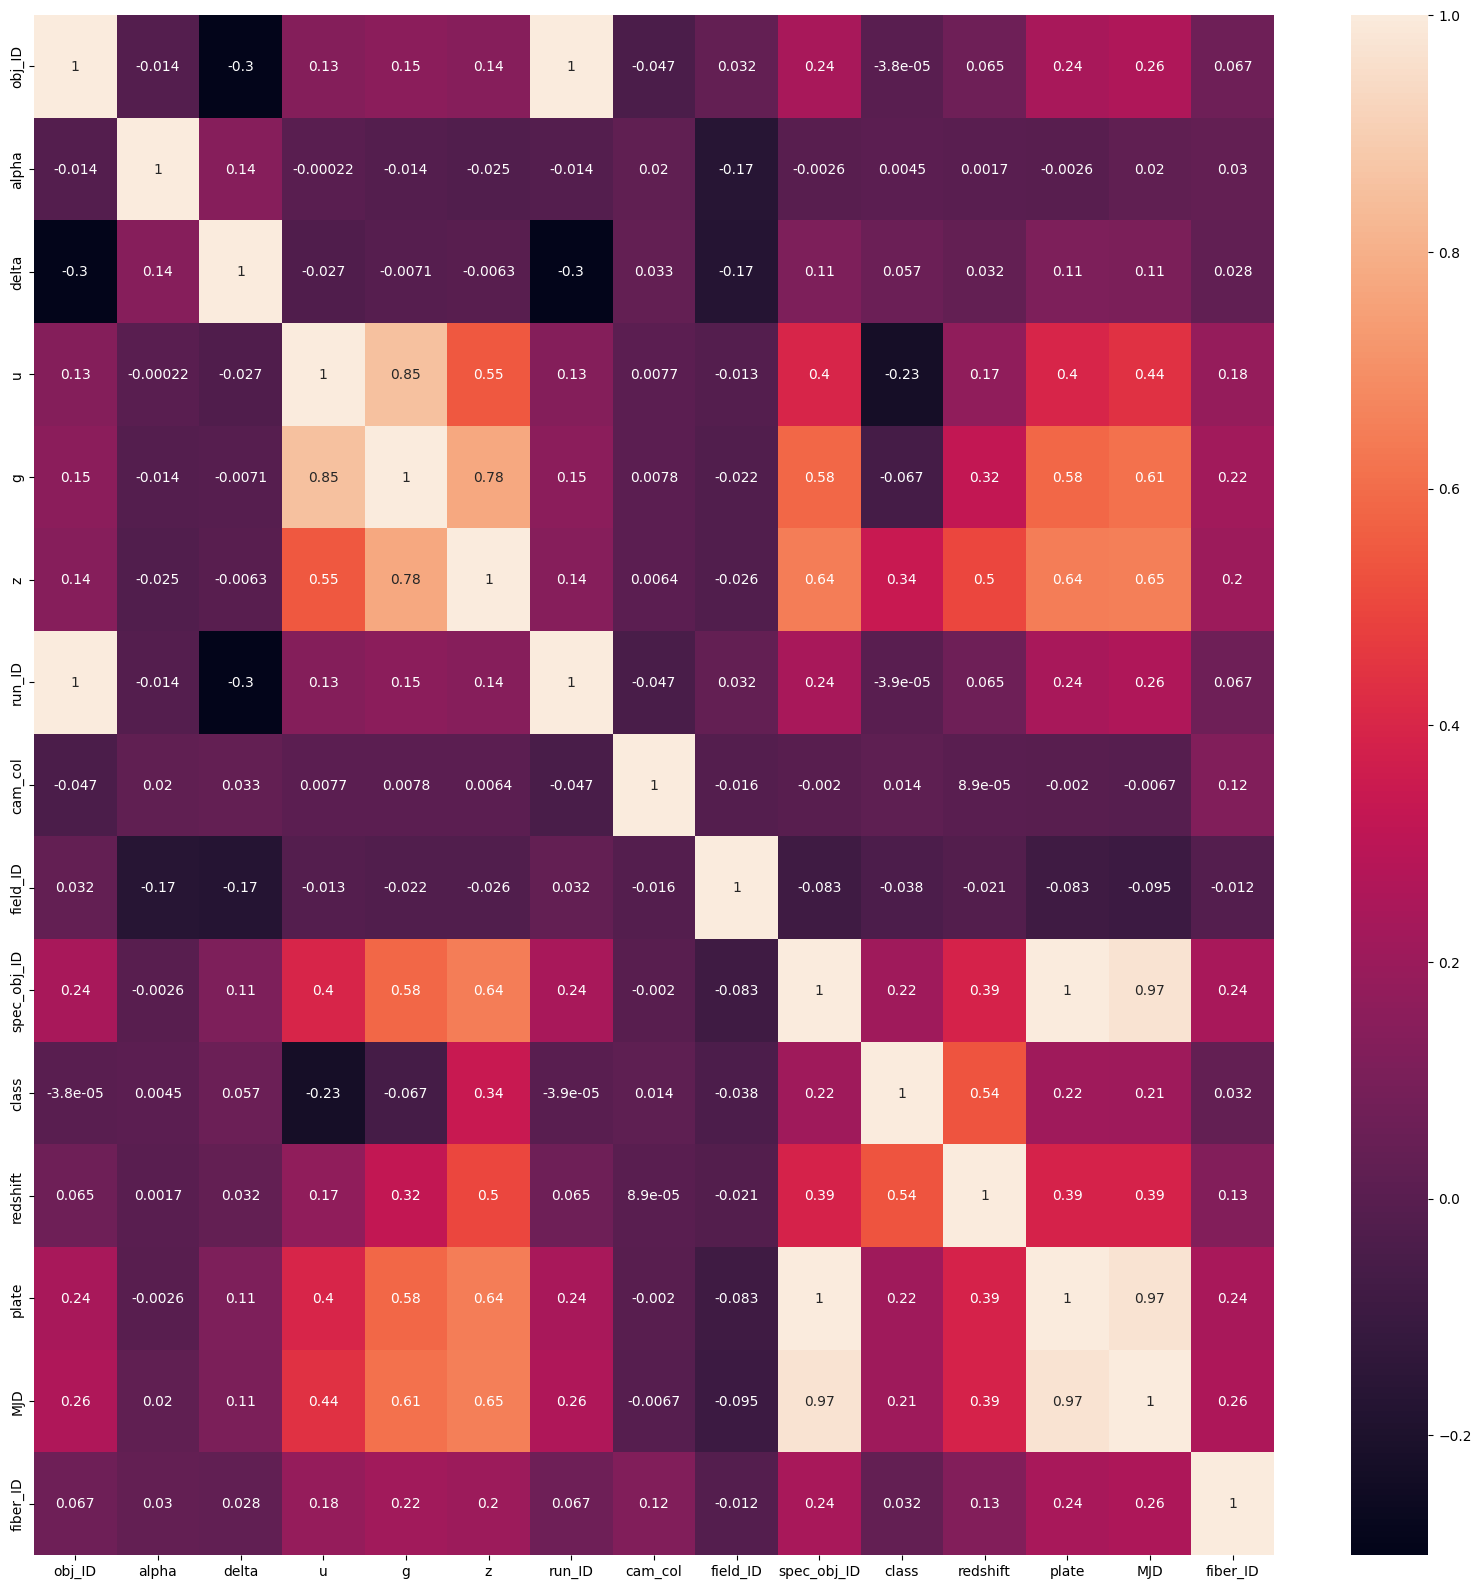

In [20]:
plt.figure(figsize=(20,20))
corr_matrix = df.corr()
sea.heatmap(corr_matrix, annot=True)
plt.show()

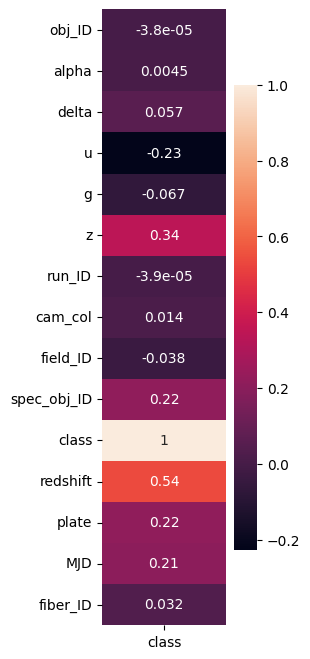

In [21]:
plt.figure(figsize=(2,8))
corr_matrix = df.corr()
sea.heatmap(corr_matrix[['class']], annot=True)
plt.show()

E' possibile subito notare che obj_ID, alpha, delta, run_ID, cam_col, field_ID e fiber_ID sono poco collineari con la classe.

In effetti:
- "Alpha" = "Right Ascension angle (at J2000 epoch)" è  l'angolo che descrive la posizione dell'oggetto sulla volta celeste, espressa in termini di ore rispetto alla posizione del Sole,  "J2000 epoch" corrisponde al 1° gennaio del 2000 alle 12:00 UT. 

- "Delta" è l'angolo che descrive la posizione dell'oggetto rispetto all'equatore celeste.

la posizione del corpo celeste non dovrebbe influenzare la sua natura (ipotizzando che siano distribuiti equamente).

Mentre:
- "obj_ID" è l'identificatore univoco di ogni oggetto presente nel dataset. 

- "run_ID" rappresenta il numero utilizzato per identificare una scansione specifica. Nel contesto dell'astronomia, una "scansione" si riferisce a un insieme di immagini ottenute da un telescopio che coprono un'area specifica del cielo.

- "cam_col" rappresenta la colonna della camera utilizzata per identificare la riga di scansione all'interno della scansione. In astronomia, le immagini vengono spesso acquisite utilizzando telescopi con più di una camera. Ogni camera copre un'area specifica del cielo e genera una propria immagine.

- "field_ID" si riferisce a un'area specifica del cielo.

- "fiber_ID" rappresenta l'ID della fibra che consente di trasportare la luce dall'obiettivo verso il rivelatore.

E' quindi possibile rimuovere queste features dato che non sembrano avere legame con la classe di appartenenza.

In [22]:
# remove features
df.drop(columns=['obj_ID', 'alpha', 'delta', 'run_ID', 'cam_col', 'field_ID', 'fiber_ID'], axis=1, inplace=True)
print(df.columns)

Index(['u', 'g', 'z', 'spec_obj_ID', 'class', 'redshift', 'plate', 'MJD'], dtype='object')


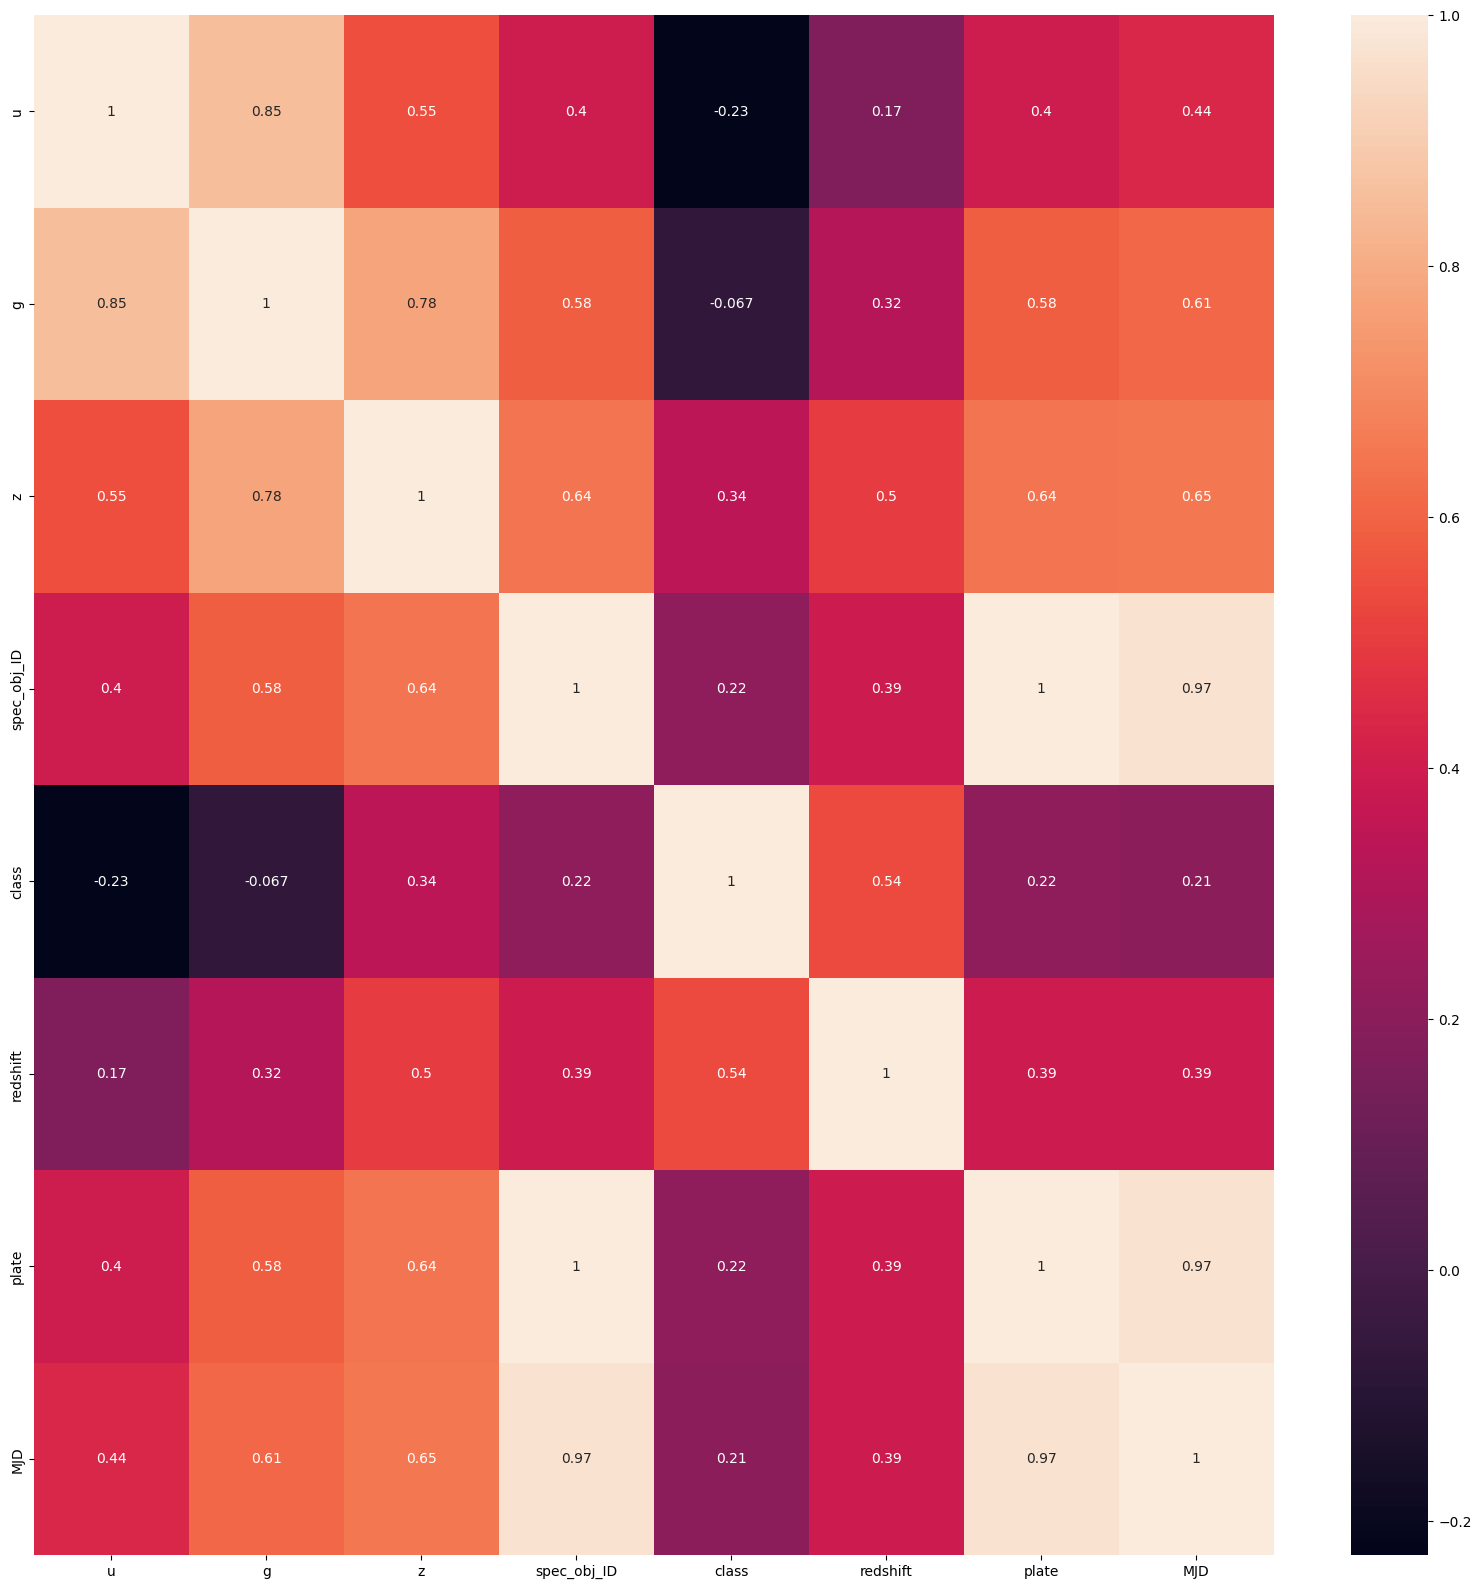

In [23]:
plt.figure(figsize=(20,20))
corr_matrix = df.corr()
sea.heatmap(corr_matrix, annot=True)
plt.show()

Le features 'spec_obj_ID', 'plate' e 'MJD' sembrano essere altamente correlate. Vediamo come influenzano l'output.

<ipython-input-24-9af6131206eb>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sea.kdeplot(data=y, label = class_[i], shade = True)
<ipython-input-24-9af6131206eb>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sea.kdeplot(data=y, label = class_[i], shade = True)
<ipython-input-24-9af6131206eb>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sea.kdeplot(data=y, label = class_[i], shade = True)
<ipython-input-24-9af6131206eb>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sea.kdeplot(data=y, label = class_[i], shade = True)
<ipython-input-2

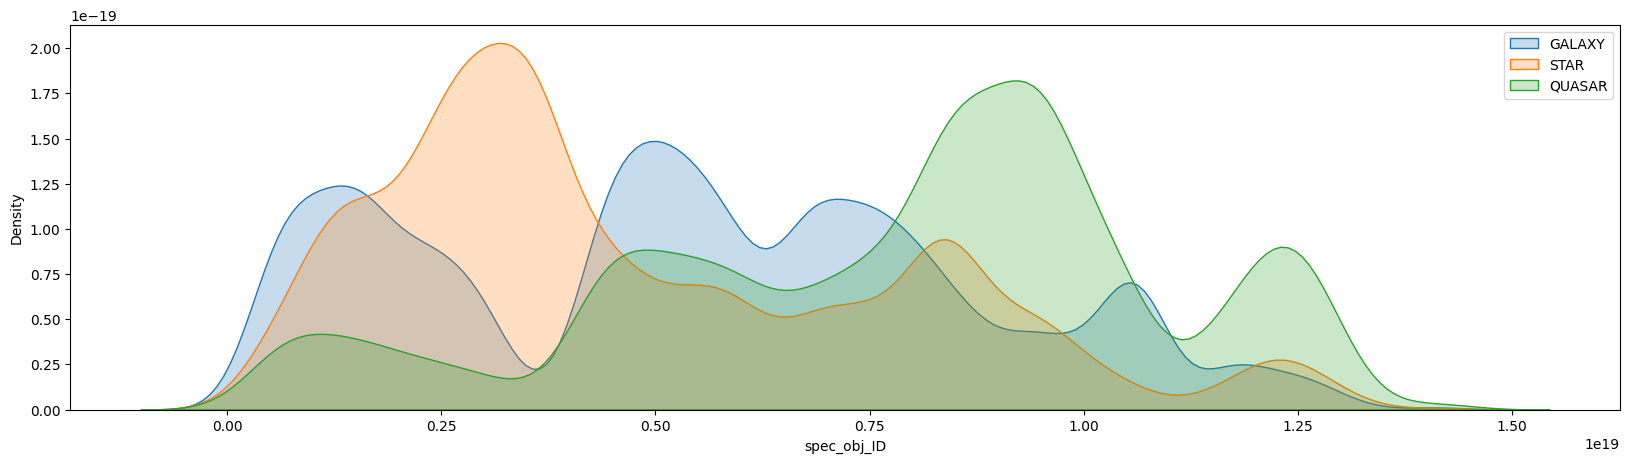

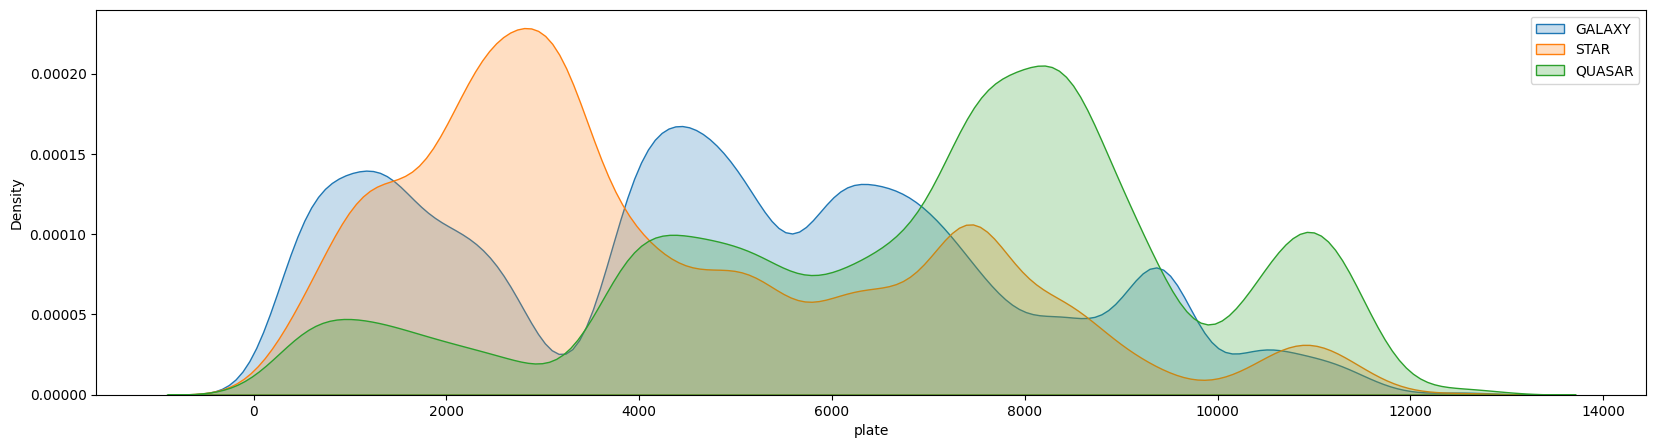

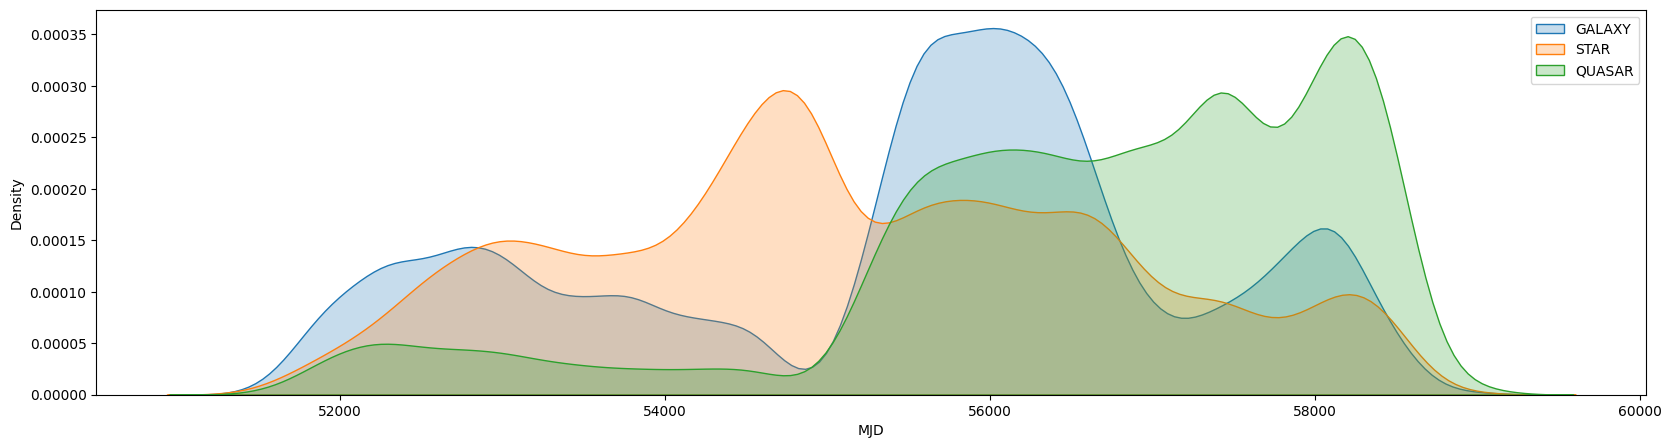

In [24]:
features = ['spec_obj_ID', 'plate', 'MJD']

for f in features:
    plt.figure(figsize=(20,5))
    for i in range(3):
        y = df[df["class"] == i][f]
        sea.kdeplot(data=y, label = class_[i], shade = True)
        plt.legend();

Le features 'spec_obj_ID' e 'plate' presentano la stessa distribuzione rispetto alle classi di output, in effetti avevano correlazione 1. E' possibile notare che le due features aiutano a distinguere facilmente tra 'STAR' e 'QUASAR'. E' però possibile rimuoverne una.

La feature 'MJD' invece presenta una distribuzione diversa e sembra essere utile all'individuazione della classe. Si è perciò deciso di mantenerla.

In [25]:
# remove features
df.drop(columns=['spec_obj_ID'], axis=1, inplace=True)
print(df.columns)

Index(['u', 'g', 'z', 'class', 'redshift', 'plate', 'MJD'], dtype='object')


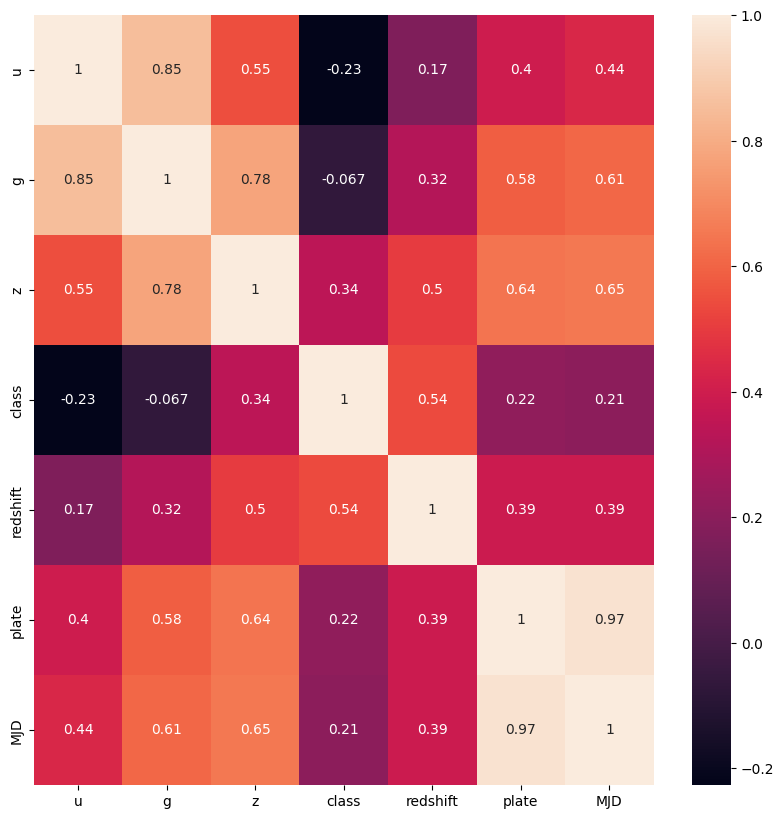

In [26]:
plt.figure(figsize=(10,10))
corr_matrix = df.corr()
sea.heatmap(corr_matrix, annot=True)
plt.show()

# Data splitting & Normalization

In [27]:
# Split data
X = df.drop(['class'], axis=1)

t = df['class']

In [28]:
# Split X and t into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size = 0.3, random_state = 0)

In [29]:
# Check the shape of X_train and X_test
print(X_train.shape)
print(X_test.shape)

(69999, 6)
(30000, 6)


In [30]:
# Normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Check if data is normalized
print(X_train.mean(axis=0))
print(X_train.std(axis=0))

[ 3.04522666e-18 -1.18510071e-15  1.04755797e-15 -2.41587981e-17
 -1.54392991e-16  7.99321244e-16]
[1. 1. 1. 1. 1. 1.]


# Gestione sbilanciamento

0    41635
1    15052
2    13312
Name: class, dtype: int64


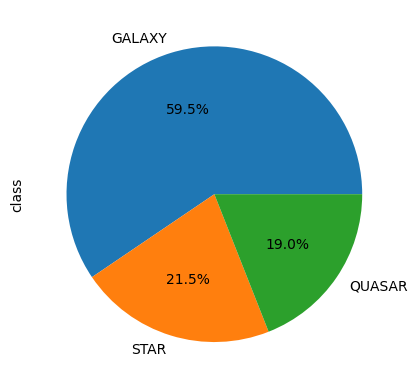

In [31]:
# Class distribution
print(t_train.value_counts())
plt.figure()
figure = (t_train.value_counts()*100.0 /len(X_train))\
		.plot.pie(autopct='%.1f%%', labels = ['GALAXY', 'STAR', 'QUASAR'])
plt.show()

In [32]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=10)
X_train, t_train = smote.fit_resample(X_train, t_train)

0    41635
1    41635
2    41635
Name: class, dtype: int64


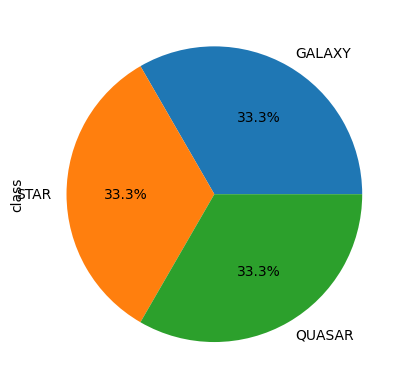

In [33]:
# Class distribution
print(t_train.value_counts())
plt.figure()
figure = (t_train.value_counts()*100.0 /len(X_train))\
		.plot.pie(autopct='%.1f%%', labels = ['GALAXY', 'STAR', 'QUASAR'])
plt.show()

Ora il dataset è bilanciato!

# Training

## Softmax Regression

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, make_scorer

In [35]:
# Initialize the softmax regression model
softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=1, max_iter=1000)
grid = {"C": np.logspace(-3, 10, 7)}

In [36]:
# Perform grid search cross-validation with f1 as the scoring metric
f1 = make_scorer(f1_score, average='weighted')
softmax_reg_cv = GridSearchCV(softmax_reg, grid, cv=5, scoring=f1)
softmax_reg_cv.fit(X_train, t_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(C=1, max_iter=1000,
                                          multi_class='multinomial'),
             param_grid={'C': array([1.00000000e-03, 1.46779927e-01, 2.15443469e+01, 3.16227766e+03,
       4.64158883e+05, 6.81292069e+07, 1.00000000e+10])},
             scoring=make_scorer(f1_score, average=weighted))

In [37]:
# Print the best parameters and accuracy from the grid search
print("Tuned hyperparameters (best parameters): ", softmax_reg_cv.best_params_)
print("F1: ", softmax_reg_cv.best_score_)

Tuned hyperparameters (best parameters):  {'C': 464158.8833612772}
F1:  0.9545615410476909


Ha scelto come iperparametro C=464158, si vuole una griglia più raffinata

In [38]:
# Initialize the softmax regression model
softmax_reg2 = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=1, max_iter=1000)
grid2 = {"C": np.logspace(3, 7, 20)}

In [39]:
# Perform grid search cross-validation with accuracy as the scoring metric
f1 = make_scorer(f1_score, average='weighted')
softmax_reg_cv2 = GridSearchCV(softmax_reg2, grid2, cv=5, scoring=f1)
softmax_reg_cv2.fit(X_train, t_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(C=1, max_iter=1000,
                                          multi_class='multinomial'),
             param_grid={'C': array([1.00000000e+03, 1.62377674e+03, 2.63665090e+03, 4.28133240e+03,
       6.95192796e+03, 1.12883789e+04, 1.83298071e+04, 2.97635144e+04,
       4.83293024e+04, 7.84759970e+04, 1.27427499e+05, 2.06913808e+05,
       3.35981829e+05, 5.45559478e+05, 8.85866790e+05, 1.43844989e+06,
       2.33572147e+06, 3.79269019e+06, 6.15848211e+06, 1.00000000e+07])},
             scoring=make_scorer(f1_score, average=weighted))

In [40]:
# Print the best parameters and accuracy from the grid search
print("Tuned hyperparameters (best parameters): ", softmax_reg_cv2.best_params_)
print("F1: ", softmax_reg_cv2.best_score_)

Tuned hyperparameters (best parameters):  {'C': 48329.30238571752}
F1:  0.9545767897522554


In [41]:
Y_hat_test = softmax_reg_cv2.predict(X_test)
print("Accuracy score on the test set: ", accuracy_score(t_test, Y_hat_test))
print("F1 score on the test set: ", f1_score(t_test, Y_hat_test, average='weighted'))

Accuracy score on the test set:  0.9537333333333333
F1 score on the test set:  0.9540433210674198


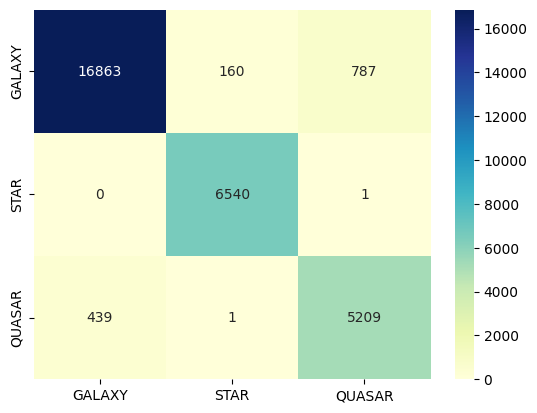

In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(t_test, Y_hat_test, labels=[0,1,2])
cm_matrix = pd.DataFrame(data=cm, columns=['GALAXY', 'STAR', 'QUASAR'],
                                  index=['GALAXY', 'STAR', 'QUASAR'])

sea.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

## SVM

In [43]:
# import SVC classifier
from sklearn.svm import SVC

In [44]:
# import metrics to compute accuracy
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [45]:
# instantiate classifier with default hyperparameters
svc=SVC()

In [46]:
# import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [47]:
# declare parameters for hyperparameter tuning
parameters = [ {'C':[1, 10, 100], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4]}
              ]

grid_search = GridSearchCV(estimator = svc,
                           param_grid = parameters,
                           scoring = 'f1_weighted',
                           cv = 5,
                           verbose=10)

In [48]:
grid_search.fit(X_train, t_train)

Fitting 5 folds for each of 19 candidates, totalling 95 fits
[CV 1/5; 1/19] START C=1, kernel=linear.........................................
[CV 1/5; 1/19] END ..........C=1, kernel=linear;, score=0.953 total time=  53.8s
[CV 2/5; 1/19] START C=1, kernel=linear.........................................
[CV 2/5; 1/19] END ..........C=1, kernel=linear;, score=0.954 total time=  53.9s
[CV 3/5; 1/19] START C=1, kernel=linear.........................................
[CV 3/5; 1/19] END ..........C=1, kernel=linear;, score=0.955 total time=  55.1s
[CV 4/5; 1/19] START C=1, kernel=linear.........................................
[CV 4/5; 1/19] END ..........C=1, kernel=linear;, score=0.951 total time=  56.4s
[CV 5/5; 1/19] START C=1, kernel=linear.........................................
[CV 5/5; 1/19] END ..........C=1, kernel=linear;, score=0.953 total time=  55.1s
[CV 1/5; 2/19] START C=10, kernel=linear........................................
[CV 1/5; 2/19] END .........C=10, kernel=linear;

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4], 'kernel': ['rbf']}],
             scoring='f1_weighted', verbose=10)

In [49]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

# calculate GridSearch CV score on test set
t_pred = grid_search.predict(X_test)

print('Model classification report with GridSearch CV: \n', classification_report(t_test, t_pred))

GridSearch CV best score : 0.9758


Parameters that give the best results : 

 {'C': 1000, 'gamma': 0.4, 'kernel': 'rbf'}


Estimator that was chosen by the search : 

 SVC(C=1000, gamma=0.4)
Model classification report with GridSearch CV: 
               precision    recall  f1-score   support

           0       0.98      0.97      0.97     17810
           1       0.97      1.00      0.99      6541
           2       0.93      0.94      0.94      5649

    accuracy                           0.97     30000
   macro avg       0.96      0.97      0.97     30000
weighted avg       0.97      0.97      0.97     30000



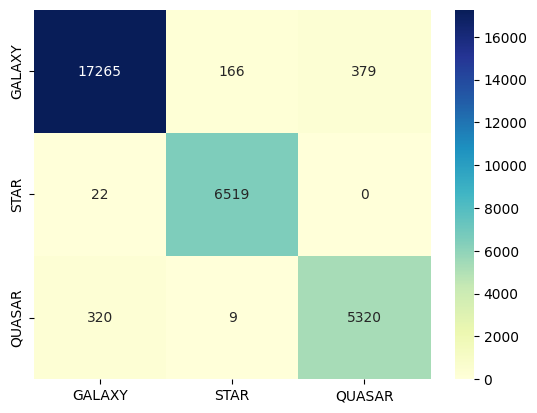

In [50]:
cm = confusion_matrix(t_test, t_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['GALAXY', 'STAR', 'QUASAR'],
                                  index=['GALAXY', 'STAR', 'QUASAR'])

sea.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()